In [5]:
from rossby_waves import *
import numpy as np
import matplotlib.pyplot as plt

def rossby_velocity(r, eps=0.1, irrotational=False, solenoidal=False):
    def f(x, t):
        return r.velocity(x[0], x[1], t, eps, irrotational, solenoidal)
    return f


def trajectory(r, x0, t0, t, n, eps=0.1, irrotational=False,
               solenoidal=False):
    f = rossby_velocity(r, eps, irrotational, solenoidal)
    h = t/n
    x = x0
    t = t0
    i = 0
    trajectory = [x]
    while i < n:
        k_1 = f(x, t)
        k_2 = f(x + h*k_1/2, t + h/2)
        k_3 = f(x + h*k_2/2, t + h/2)
        k_4 = f(x + h*k_3, t + h)
        x = x + h/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
        i += 1
        t += h
        trajectory.append(x)
    x_coords = [x[0] for x in trajectory]
    y_coords = [x[1] for x in trajectory]
    return x_coords, y_coords

In [2]:
k = 1
l = 1
r = RossbyWave(np.array([k, l]))

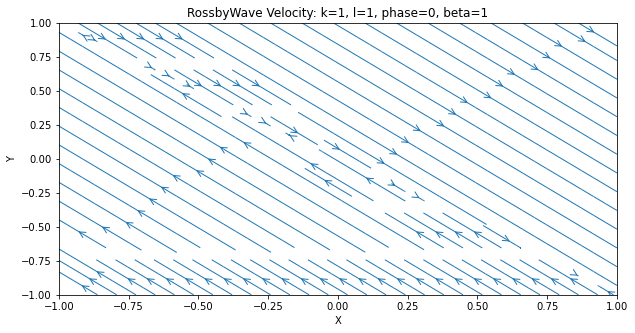

In [3]:
RossbyWave.plot_velocity(r)

In [11]:
x_, y_ = trajectory(r, np.array([0.25,0]), 0, 10, 100)

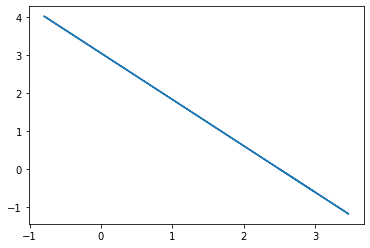

In [12]:
X = np.linspace(-np.pi, np.pi, 20)
Y = np.linspace(-np.pi, np.pi, 20)
x, y = np.meshgrid(X, Y)
fig, ax = plt.subplots()
ax.plot(x_, y_)

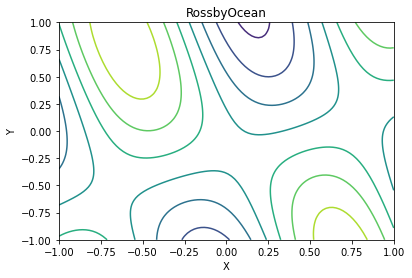

In [24]:
ro = RossbyOcean([r])
ro.add_random_waves(2)
ro.plot_streamfunction()

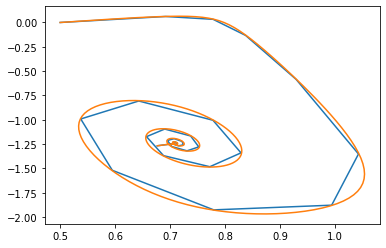

In [25]:
x_1, y_1 = trajectory(ro, np.array([0.5,0]), 0, 1, 80)
x_2, y_2 = trajectory(ro, np.array([0.5,0]), 0, 1, 1000)

fig, ax = plt.subplots()
ax.plot(x_1, y_1)
ax.plot(x_2, y_2)
plt.show()